# Generate trining set to train Neural Network v0.1 (playing around)

#1 First try to find adequate python libraries 
- Draw from normal distribution (np.random.normal)

In [1]:
import numpy as np

Some fancy plotting tools... (Doesn't work yet on private machine since jupyter doesn't allow super fast data transmission)

In [38]:
import plotly.offline as py
import plotly.tools as tls
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
import math
import scipy.stats as sc
from scipy.special import wofz
from astropy.modeling.functional_models import Voigt1D 

matplotlib.rcParams['figure.figsize']=(7,5)
py.init_notebook_mode()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [3]:
def plotly_show():
    fig = plt.gcf()
    py.iplot_mpl(fig)

In [ ]:
%matplotlib inline

## Normal Distribution

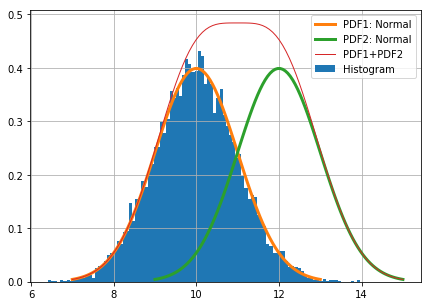

In [16]:
# Generate normal distribution by randomly generating normal distributed numbers and overlaying 
# the PDF 

# Definition of the PDF
def gauss(x, mu, sigma):
    value = ( 1.0 / ( math.sqrt(2*math.pi) * sigma ) ) * math.e**( -1 * ( ( x - mu )**2 )/( 2 * sigma**2 ))
    return value
# Definition of some parameters
dist_size = 10000
mu1 = 10
mu2 = 12
sigma1 = 1
sigma2 = 1
# Draw random values from PDF
normal_dist = np.random.normal(loc=mu1,scale=sigma1,size=dist_size)
# Plot results
plt.hist(normal_dist,bins=100, normed=True, label="Histogram")
x1 = np.linspace(mu1 - 3*sigma1, mu1 + 3*sigma1, 100)
x2 = np.linspace(mu2 - 3*sigma2, mu2 + 3*sigma2, 100)
x3 = np.linspace(mu1 - 3*sigma1, mu2 + 3*sigma2, 100)
plt.plot(x1,gauss(x1, mu1, sigma1), label = "PDF1: Normal", linewidth=3)
plt.plot(x2,gauss(x2, mu2, sigma2), label = "PDF2: Normal", linewidth=3)
plt.plot(x3,(gauss(x3, mu1, sigma1)+gauss(x3, mu2, sigma2)), label = "PDF1+PDF2", linewidth=1)
plt.grid(True)
plt.legend()
plt.show()

## Lorentz Distribution

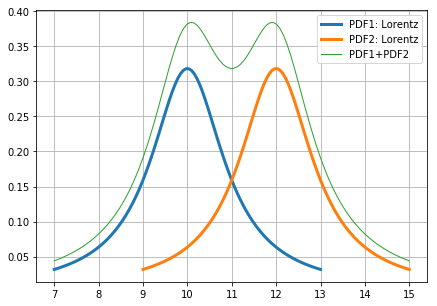

In [17]:
# Generate normal distribution by randomly generating normal distributed numbers and overlaying 
# the PDF 

# Definition of the PDF
def lorentz(x, x0, gamma):
    value = ( 1.0 / ( math.pi * gamma ) ) * ( ( ( gamma )**2 )/( ( x - x0 )**2 + gamma**2 ))
    return value
# Definition of some parameters
dist_size = 10000
x01 = 10
x02 = 12
gamma1 = 1
gamma2 = 1
# Draw random values from PDF
lorentz_dist = sc.cauchy(loc=x01,scale=gamma1)
# Plot results
#plt.hist(lorentz_dist,bins=100, normed=True, label="Histogram")
x1 = np.linspace(x01 - 3*gamma1, x01 + 3*gamma1, 100)
x2 = np.linspace(x02 - 3*gamma2, x02 + 3*gamma2, 100)
x3 = np.linspace(x01 - 3*gamma1, x02 + 3*gamma2, 100)
plt.plot(x1,lorentz(x1, x01, gamma1), label = "PDF1: Lorentz", linewidth=3)
plt.plot(x2,lorentz(x2, x02, gamma2), label = "PDF2: Lorentz", linewidth=3)
plt.plot(x3,(lorentz(x3, x01, gamma1)+lorentz(x3, x02, gamma2)), label = "PDF1+PDF2", linewidth=1)
plt.grid(True)
plt.legend()
plt.show()

## Convolution: Voigt profile

Voigt profile is given by the convolution of the Gaussian and Lorentzian. In Python it can be assessed by taking the real part of the Faddeeva function:
$$
V(x; \sigma, \gamma) = \int_{-\infty}^\infty G(x';\sigma)L(x-x';\gamma)\,\mathrm{d}x' 
$$
$$
V(x;\sigma,\gamma) = \frac{\renewcommand\Re{\operatorname{Re}}\Re{[w(z)]}}{\sigma\sqrt{2\pi}}, \;\mathrm{where}\;z = \frac{x + i\gamma}{\sigma\sqrt{2}}.
$$

### Scipy implementation

In [ ]:
# Generate Voigt profile 
"""
Source: https://scipython.com/book/chapter-8-scipy/examples/the-voigt-profile/
"""
# Some parameters
sigma = 1
gamma = 1
# Definition of the PDF
def voigt(x, sigma, gamma):
    """
    Return the Voigt line shape at x with Lorentzian component HWHM gamma
    and Gaussian component HWHM sigma.

    """
    value = np.real(wofz((x + 1j*gamma)/sigma/np.sqrt(2))) / (sigma*np.sqrt(2*np.pi))
    return value

x = np.linspace(0 - 6*gamma, 0 + 6*gamma, 100)
plt.plot(x, voigt(x, sigma, gamma), label='Voigt', linewidth=3, )
plt.plot(x, gauss(x, 0, sigma), '-', color = "gray", label='Gauss', linewidth=1, )
plt.plot(x, lorentz(x, 0, gamma), '--', color = "gray", label='Lorentz', linewidth=1, )
plt.grid(True)
plt.legend()
plt.show()


### Astropy implementation

In [ ]:
"""
Source
    http://docs.astropy.org/en/stable/api/astropy.modeling.functional_models.Voigt1D.html
Source for algorithm: closed excess paper (elsevier, science direct):
    https://www.sciencedirect.com/science/article/pii/0368204894021897
    --> But no problem for www.sci-hub."insert_trusted_domain_here"
"""
gamma = 1
sigma = 1
x = np.linspace(0 - 6*gamma, 0 + 6*gamma, 100)
plt.figure()
# 0.3183098861837907
v1 = Voigt1D(x_0=0, amplitude_L=0.25, fwhm_L=2*gamma, fwhm_G=sigma)
plt.plot(x, v1(x), label='Voigt, astropy implementation')
plt.plot(x, voigt(x, sigma, gamma), label='Voigt, scipy implementation', linewidth=3, )
plt.grid(True)
plt.legend()
plt.show()